# Amplify Task

Import necessary libraries

In [80]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


 Question 1


a. Load the dataset into R or Python and identify the type of the dataset features and report them.

In [86]:
df = pd.read_csv('train_small.csv')


$\color{red}{\text{Explore dataset}}$


In [87]:
df.shape

(2380557, 54)

In [89]:
df.head()

,search_id,timestamp,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,...,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked
0,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,3625,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11622,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11826,5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,22824,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,37581,5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380557 entries, 0 to 2380556
Data columns (total 54 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   search_id                       int64  
 1   timestamp                       object 
 2   site_id                         int64  
 3   user_country_id                 int64  
 4   user_hist_stars                 float64
 5   user_hist_paid                  float64
 6   listing_country_id              int64  
 7   listing_id                      int64  
 8   listing_stars                   int64  
 9   listing_review_score            float64
 10  is_brand                        int64  
 11  location_score1                 float64
 12  location_score2                 float64
 13  log_historical_price            float64
 14  listing_position                int64  
 15  price_usd                       float64
 16  has_promotion                   int64  
 17  destination_id             

Dataset features are mainly from type int64 and float64. 
Boolean values are presented as 0 and 1 (type int64)

b. Perform summary statistics and explain what issues these statistics reveal.


In [50]:
df.describe(include='all')

,search_id,timestamp,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,...,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked
count,2.380557e+06,2380557,2.380557e+06,2.380557e+06,122780.000000,123494.000000,2.380557e+06,2.380557e+06,2.380557e+06,2.377071e+06,...,47961.000000,154468.000000,174850.000000,67832.000000,913495.000000,947465.000000,292700.000000,2.380557e+06,66388.000000,2.380557e+06
unique,NaN,95578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2013-01-13 19:26:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.337016e+05,NaN,9.970224e+00,1.754588e+02,3.382814,178.094940,1.739159e+02,7.008190e+04,3.180607e+00,3.779416e+00,...,17.196243,0.147856,0.083180,20.109919,-0.060010,0.009595,21.731093,4.456688e-02,383.229069,2.788759e-02
std,1.923719e+05,NaN,7.667827e+00,6.585934e+01,0.694562,108.568025,6.832483e+01,4.060398e+04,1.052086e+00,1.049727e+00,...,29.536009,0.579293,0.317575,63.110961,0.469455,0.203876,800.608005,2.063509e-01,527.019882,1.646508e-01
min,4.000000e+00,NaN,1.000000e+00,1.000000e+00,1.500000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,0.000000e+00,0.000000,0.000000e+00
25%,1.674260e+05,NaN,5.000000e+00,1.000000e+02,2.950000,111.090000,1.000000e+02,3.502800e+04,3.000000e+00,3.500000e+00,...,6.000000,0.000000,0.000000,7.000000,0.000000,0.000000,7.000000,0.000000e+00,124.150000,0.000000e+00
50%,3.332720e+05,NaN,5.000000e+00,2.190000e+02,3.450000,152.620000,2.190000e+02,6.961500e+04,3.000000e+00,4.000000e+00,...,11.000000,0.000000,0.000000,12.000000,0.000000,0.000000,11.000000,0.000000e+00,219.185000,0.000000e+00
75%,5.007050e+05,NaN,1.400000e+01,2.190000e+02,3.950000,215.950000,2.190000e+02,1.051420e+05,4.000000e+00,4.500000e+00,...,18.000000,1.000000,0.000000,20.000000,0.000000,0.000000,17.000000,0.000000e+00,432.125000,0.000000e+00


In [98]:
#Check for duplicated values
df.duplicated().sum()

0

In [95]:
#Missing data
df.isnull().sum()

search_id                               0
timestamp                               0
site_id                                 0
user_country_id                         0
user_hist_stars                   2257777
user_hist_paid                    2257063
listing_country_id                      0
listing_id                              0
listing_stars                           0
listing_review_score                 3486
is_brand                                0
location_score1                         0
location_score2                    525992
log_historical_price                    0
listing_position                        0
price_usd                               0
has_promotion                           0
destination_id                          0
length_of_stay                          0
booking_window                          0
num_adults                              0
num_kids                                0
num_rooms                               0
stay_on_saturday                  

In [93]:
#As percentage
df.isnull().sum() / df.shape[0] * 100.00

search_id                          0.000000
timestamp                          0.000000
site_id                            0.000000
user_country_id                    0.000000
user_hist_stars                   94.842384
user_hist_paid                    94.812391
listing_country_id                 0.000000
listing_id                         0.000000
listing_stars                      0.000000
listing_review_score               0.146436
is_brand                           0.000000
location_score1                    0.000000
location_score2                   22.095333
log_historical_price               0.000000
listing_position                   0.000000
price_usd                          0.000000
has_promotion                      0.000000
destination_id                     0.000000
length_of_stay                     0.000000
booking_window                     0.000000
num_adults                         0.000000
num_kids                           0.000000
num_rooms                       

In [105]:
#Find unigue values
df.nunique()


search_id                          95842
timestamp                          95578
site_id                               34
user_country_id                      192
user_hist_stars                      292
user_hist_paid                      4345
listing_country_id                   166
listing_id                        117378
listing_stars                          6
listing_review_score                  10
is_brand                               2
location_score1                      337
location_score2                     9082
log_historical_price                 381
listing_position                      40
price_usd                          62712
has_promotion                          2
destination_id                     13122
length_of_stay                        33
booking_window                       392
num_adults                             9
num_kids                              10
num_rooms                              8
stay_on_saturday                       2
log_click_propor

After exploring the dataset, some issues have been identified:
1. There are many missing values. Some columns like 'user_hist_stars', 'user_hist_paid', 'booking_value' and all 'competitor's' columns have more than 90 % missing values.
2. Furthermore, the dataset highly imbalanced. Such data could not be used for ML model creation. It is advisable to process the data beferehand with techniques like resampling, SMOTE, etc. Otherwise, the model definately would be biased, overfitted and generally not reliable.
3. Data is not refined. Right now it won't produce accurate models. In case we need to determine future bookings, sales, etc we should use some regression model. Such models are known to work better with normalized/standartized data.
4. From statistical perspective it is not very clear what information bring to us the competitor's columns. They are too many, not known how the data is fetched and generally can not be used in models before being processed.
5. Many values aren't unique which questions the reliability of the entire dataset.
6. Overall, the dataset is not structured.
7. File format is .csv and the size is above 400 MB which is not the fastest solution. Some other compression formats could be used.



c. Perform exploratory analysis to identify any collinearities and explain which issues collinearity causes.


In [18]:
df.corr()

,search_id,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,...,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked
search_id,1.000000,0.003338,-0.000633,-0.000741,-0.021676,-0.001352,-0.000353,0.000264,-0.000069,-0.001236,...,0.006069,0.004199,-0.003893,0.002156,0.001695,-0.000787,0.000319,-0.000719,-0.003377,-0.000324
site_id,0.003338,1.000000,-0.304867,0.307889,0.083580,-0.316166,0.003156,0.173546,-0.072936,-0.198551,...,-0.001176,0.003143,-0.021009,-0.003627,0.015761,-0.007528,-0.000828,0.008371,0.087384,-0.000576
user_country_id,-0.000633,-0.304867,1.000000,-0.254607,-0.061223,0.475955,0.000759,-0.111548,0.062330,0.182769,...,-0.012217,-0.001957,-0.006318,-0.016298,-0.017937,0.012186,0.000831,-0.004951,-0.072842,0.002178
user_hist_stars,-0.000741,0.307889,-0.254607,1.000000,0.487225,-0.301045,0.008177,0.279543,0.000278,-0.190238,...,-0.000537,0.003156,0.026186,0.007809,0.044701,-0.018056,0.000671,0.001130,0.214766,-0.000805
user_hist_paid,-0.021676,0.083580,-0.061223,0.487225,1.000000,-0.069117,-0.003065,0.145106,0.046773,-0.056761,...,-0.013489,0.009881,0.003239,-0.008130,0.018274,-0.015989,0.001329,0.001298,0.326537,-0.000306
listing_country_id,-0.001352,-0.316166,0.475955,-0.301045,-0.069117,1.000000,-0.000912,-0.163322,0.091492,0.313086,...,-0.035843,-0.002624,-0.065033,-0.018132,-0.036254,0.012347,-0.001307,-0.006302,-0.091785,0.000763
listing_id,-0.000353,0.003156,0.000759,0.008177,-0.003065,-0.000912,1.000000,0.003125,-0.000409,0.001046,...,0.011076,-0.006031,-0.003361,0.010853,0.002792,0.005073,-0.002888,-0.000465,-0.008185,-0.000282
listing_stars,0.000264,0.173546,-0.111548,0.279543,0.145106,-0.163322,0.003125,1.000000,0.304868,0.021530,...,-0.027103,-0.015933,-0.033033,-0.011550,0.037437,-0.029524,0.015840,0.031012,0.258911,0.022089
listing_review_score,-0.000069,-0.072936,0.062330,0.000278,0.046773,0.091492,-0.000409,0.304868,1.000000,0.202763,...,-0.024589,-0.011839,0.001712,-0.016191,0.067580,-0.005990,0.007876,0.024103,0.112661,0.025697
is_brand,-0.001236,-0.198551,0.182769,-0.190238,-0.056761,0.313086,0.001046,0.021530,0.202763,1.000000,...,-0.098406,-0.002987,-0.057431,-0.038277,-0.012788,-0.056603,0.000817,0.001456,-0.047881,0.009751


In [107]:
df.corr().unstack().sort_values().drop_duplicates()

distance_to_dest                listing_country_id               -0.372571
site_id                         listing_country_id               -0.316166
                                user_country_id                  -0.304867
user_hist_stars                 listing_country_id               -0.301045
length_of_stay                  stay_on_saturday                 -0.292526
                                                                    ...   
competitor8_rate                competitor5_rate                  0.636241
competitor8_price_percent_diff  competitor3_price_percent_diff    0.771770
clicked                         booked                            0.784226
search_id                       search_id                         1.000000
clicked                         booking_value                          NaN
Length: 1378, dtype: float64

<AxesSubplot:xlabel='clicked', ylabel='booked'>

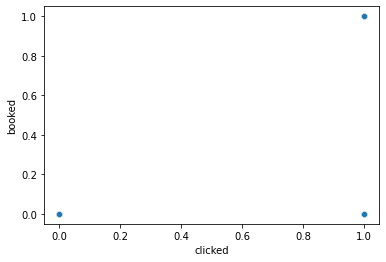

In [10]:
sns.scatterplot(x="clicked", y="booked", data=df)

In terms of correlation only two columns with correlation above 78 % were identified. These columns are 'clicked'& 'booked' (78 % positive correlation) and 'competitor8_price_percent_diff'&'competitor3_price_percent_diff' (77 % positive correlation). As a rule of thumb high correlation usually leads to overfitting and should be avoided. Usually one of the correlated columns is dropped from the dataset.
Multicollinearity reduces the precision of the estimated coefficients, which weakens the statistical power of the regression model. P-values could help us to identify independent variables that are statistically significant.

d. There is currently a problem in the data which will lead to inflation in the success of the metric of choice (i.e. inflated accuracy, or false reduction in loss). This will keep the model from generalizing to the test set. Please identify what it is and explain the problem.

The data suggests its a regression problem. In order to perform the regression we need to have independant variables which are not highly correlated. Otherwise the model would not generalize. 

As we discuss above, low training data leads to overfitting as the model is unable to explore all the possibilities. So, by increase the size of the training data will help to reduce the overfitting problem.


e. Propose and implement the solutions for the issues you have found. The issues listed here are not exhaustive. If you encounter any other issues, please propose and implement solutions for those as well.

I would suggest to:
1. Drop some of the columns which convey insignificant information. For instance the columns containing info about competitors.
2. If needed I would use SMOTE technigue to fill missing values in inbalanced columns in order to be used for regression models.
3. Drop columns with high correlation before using a model. In this case I would drop 'clicked' column.

f. Are there any data privacy and security issues in this dataset? If so, what are they? How would you solve these problems?


In my opinion the data lacks any security measures. 

Firts, the dataset is not protected with password or any ID identifiaction, so anyone could view the entire dataset.

Second, it is not encrypted with key that would protect from unwanted access. 
I would advise to encrypt the data and provide credentials to a group of individuals directly involved in that project. The dataset could be split and viewed partially depending on the role of the users.

QUESTION 2



a. Calculate Click-Through Rates and Conversion Rates.

In [111]:
#Click-through rate
ctr = df['clicked'].sum()/df['search_id'].sum()*100
print(ctr)
#Conversion rate
conv_r = df['booked'].sum()/df['search_id'].sum()*100
print(conv_r)

1.3355308259188395e-05
8.357043798056432e-06



b. How do property review score and property star rating affect click-through and conversion rates? Employ statistical techniques to formally compare the effects of different levels of these variables.

In [116]:
#Easiest way to find how variables are linked is to find the correlation between them i.e. how a change in one independent variable will affect the other
#1. Click-through rate
df['new']=df['clicked']/df['search_id']
ctr_lstars = df['new'].corr(df['listing_stars']).sum()*100
print(ctr_lstars)
df['new']=df['clicked']/df['search_id']
ctr_lstars = df['new'].corr(df['listing_review_score']).sum()*100
print(ctr_lstars)

-0.01453672890292767
-0.0003341401888401096


QUESTION 3

i. This dataset has 3 possible outcome variables: clicked, booking_value and booked. Select one of those variables to model and train a machine learning model of your choice.

I would choose 'booked' variable as target variable. It should be kind of regression model. I would suggest logisting regression model

In [71]:
df_logistic = df[['listing_review_score', 'booked']]
df_logistic.columns = ['listing_review_score', 'booked']
#display the first 5 rows
df_logistic.head()


,listing_review_score,booked
0,4.0,0
1,4.0,0
2,4.5,0
3,4.0,0
4,4.5,0


In [82]:
df.fillna(df['listing_review_score'].mean())
X = np.array(df_binary['listing_review_score']).reshape(-1, 1)
y = np.array(df_binary['booked']).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
 
# Splitting the data into training and testing data
logisticRegr = LogisticRegression()
 
logisticRegr.fit(X_train, y_train)
print(logisticRegr.score(X_test, y_test))

/Users/test2017/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9721494102228048


ii. You are required to explain the following details:

a. Which outcome variable did you choose and why?

Booked variable because I want to see how listing review affect the booking rate


b. Which variables did you include in the initial model?

Logistic regression between review score and booking.

c. Which transformations/preprocesses did you apply? Why did you apply those transformations? What would have happened if you didn't apply those tech- niques?

In order to find meaningful relationship between variables for logistic regression, I decided to choose 'listing_reviev_score' column because it has lowest null rows (only 3 486 rows blank). 
Thus, it was easier to impute the mssing data with the mean value of the column. 
If the model is feed with missing values it is prone to overfit, have low accuracy and not generalize well.


d. Which machine learning technique did you choose? Why?

Logistic regression. Rationale behind is that booked data is boolean type, i.e. has only two possible outcomes booked or not booked

e. Which evaluation metric did you use to optimize the machine learning model? Why did you choose it? What are the implications of the final metric value?

I used ROC curve between true positive rate and false positive rate.
It is great tool to show the performance of regression models and whether they need to be further optimized.
The curve shows the model is performing well on the dataset.

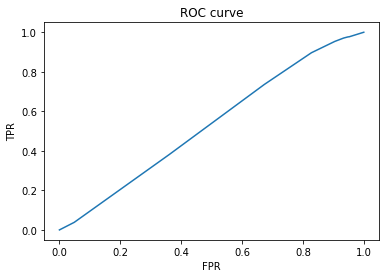

In [81]:
y_pred_proba = logisticRegr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
plt.plot(fpr,tpr)
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC curve')
plt.show()


f. How would you interpret this model? If the model is too complex to be directly interpreted, how would you approach this problem?

In my view the model found strong connection between variables and shows good results. 
If the model was too complex possibly I would choose some form of regularization.